# Análise de Fourier
### Uma introdução

> Referências:
> - Fourier Analysis: An Introduction, Stein & Shakarchi (2007), Princeton Lectures in Analysis
> - An Introduction to Partial Differential Equations, Pinchover & Rubinstein (2005), Cambridge University Press


Anotações dedicadas ao estudo da Análise de Fourier, inspiradas pelo curso: Análise de Fourier em Grafos, prof.: Cesar Niche (UFRJ 2020)

`Gil Miranda: www.github.com/mirandagil`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
def f(x):
    return x**3 + 2*x**2 + 87

In [3]:
xs = np.arange(0.1, 2*np.pi+0.1, 5e-2)

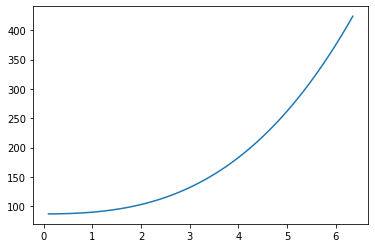

In [4]:
plt.plot(xs, f(xs))

In [30]:
def mult_cos(x, k, df):
    return df(x)*np.cos(k*x)

def mult_sin(x, k, df):
    return df(x)*np.sin(k*x)

In [32]:
def A_k(k, x, df, interval):
    integ = integrate.quad(mult_cos, interval[0], interval[1], args=(k, df))
    return 1/np.pi*integ[0]

In [33]:
def B_k(k, x, df, interval):
    if k == 0:
        integ = 0
    else:
        integ = integrate.quad(mult_sin, interval[0], interval[1], args=(k, df))[0]
    return 1/np.pi * integ

In [42]:
def fourier(F, x, n = 10, interval = [-np.pi, np.pi], ret = False):
    A = np.zeros((len(x), n))
    B = np.zeros((len(x), n))
    
    for i in range(len(x)):
        for j in range(n):
            A[i,j] = A_k(j, x[i], F, interval)*np.cos(j*x[i])
            B[i,j] = B_k(j, x[i], F, interval)*np.sin(j*x[i])
    A[:,0] = A[:,0]/2
    ff_A = np.sum(A, axis = 1)
    ff_B = np.sum(B, axis = 1)
    ff = ff_A+ff_B
    if ret == True:
        return ff, ff_A, ff_B
    else:
        return ff

In [70]:
c = fourier(f, xs, 20)

In [77]:
def funcao(x):
    return x**3-2*x

In [67]:
def g(x):
    return np.linalg.norm(x)

In [68]:
def g2(x):
    return [np.linalg.norm(xi) for xi in x]

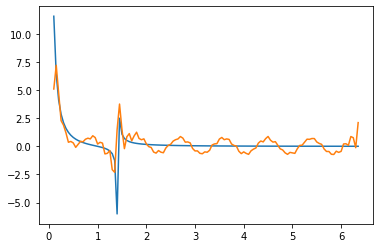

In [86]:
plt.plot(xs, funcao(xs))
plt.plot(xs, d)

In [85]:
d = fourier(funcao, xs, 40)

<ipython-input-81-6faaf94758e9>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integ = integrate.quad(mult_cos, 0.1, 2*np.pi+0.1, args=(k, df))
<ipython-input-81-6faaf94758e9>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integ = integrate.quad(mult_cos, 0.1, 2*np.pi+0.1, args=(k, df))
<ipython-input-82-541abd91facb>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integ = integrate.quad(mult_sin, 0.1, 2*np.pi+0.1, args=(k, df))[0]
<ipython-input-82-541abd91facb>:5: IntegrationWarning: The maximum number of s

In [ ]:
plt.pl

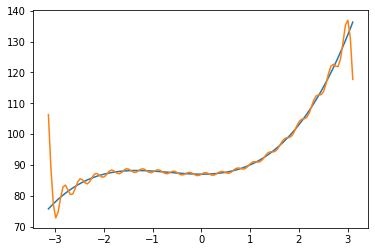

In [71]:
plt.plot(xs, f(xs))
plt.plot(xs, c)

In [45]:
c.shape

(126, 10)

In [56]:
c = np.array([[1,2,3],[5,6,7]])

In [57]:
c

array([[1, 2, 3],
       [5, 6, 7]])

In [16]:
def step_f(x):
    if x <= 1/2 and x > 0:
        return 1
    else:
        return -1

In [17]:
xs = np.linspace(-1/2,1/2, 100)
step_f_real = [step_f(i) for i in xs]

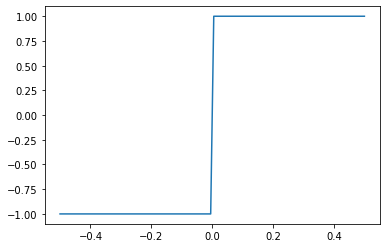

In [18]:
plt.plot(xs, step_f_real)

In [74]:
def step_f_fourier(xs, n=10):
    def do_step(x):
        soma = 0
        for k in range(1,n+1):
            soma += + 2/(np.pi*k)*(-np.cos(k*np.pi/2)+1)*np.sin(k*x*np.pi)
        return soma
    funcao = [do_step(i) for i in xs]
    return funcao

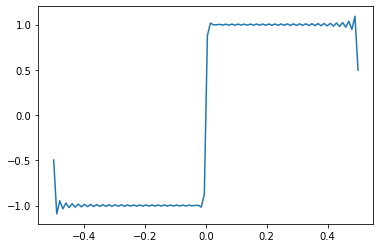

In [77]:
plt.plot(xs,step_f_fourier(xs, 100))

In [82]:
np.linspace(1,100,5)

array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ])

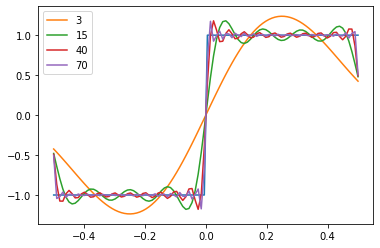

In [96]:
steps = [3,15,40,70]
plt.plot(xs, step_f_real)
for i in steps:
    plt.plot(xs,step_f_fourier(xs, int(i)), label = int(i))
plt.legend()
plt.show()

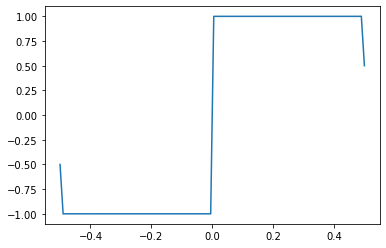

In [98]:
plt.plot(xs,step_f_fourier(xs, 10000))

In [43]:
meu_f, A, B = fourier(step_f, xs, 100, [-1/2, 1/2], True)

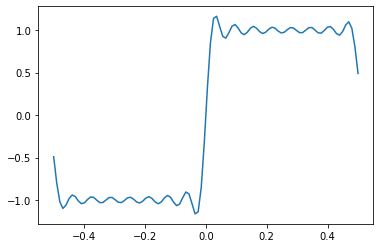

In [44]:
plt.plot(xs, meu_f)

## Discrete Fourier Transform

$$\hat{f}_k = \sum_{j = 0}^{N-1} f_j e^{-\frac{i2\pi jk}{n}}$$
Tomando
$$\omega = e^{-\frac{2\pi i}{n}}$$

In [43]:
def DFT(fs):
    n = len(fs)
    w = np.exp(-1.j*np.pi*2/n)
    f_hat = [[fs[i]*w**(i*k) for i in range(n)] for k in range(n)]
    return np.sum(f_hat, axis = 1)

In [44]:
def iDFT(fs_hat):
    n = len(fs_hat)
    w = np.exp(-1.j*np.pi*2/n)
    f = [[fs_hat[i]*w**(-i*k)/n for i in range(n)] for k in range(n)]
    return np.sum(f, axis = 1)

In [17]:
fs = [5,6,8,10,15,33,85,33,22]

In [35]:
fs_hat = DFT_1(fs)

In [39]:
f = iDFT_1(fs_hat)

In [38]:
len(fs)

9

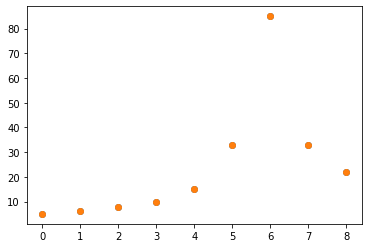

In [42]:
plt.scatter([0,1,2,3,4,5,6,7,8],fs)
plt.scatter([0,1,2,3,4,5,6,7,8],f)

/home/gil/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


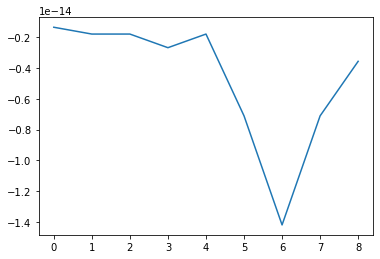

In [29]:
plt.plot(fs_hat)

In [ ]:
DFT_1()

In [8]:
1.j**2

(-1+0j)

In [13]:
np.sum(np.ones((2,3)), axis = 1)

array([3., 3.])